In [1]:
# Install required libraries
!pip install pathway bokeh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of boto3 to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 17

In [2]:
import numpy as np
import pandas as pd
import pathway as pw
from bokeh.plotting import figure, output_notebook, show
output_notebook()

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from math import radians, cos, sin, sqrt, atan2


# Load the data
df = pd.read_csv('/content/dataset (2).csv')

# Combine Date and Time
df['LastUpdated'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], dayfirst=True)
df.drop(columns=['LastUpdatedDate', 'LastUpdatedTime', 'ID'], inplace=True)
df = df.sort_values('LastUpdated').reset_index(drop=True)
df.to_csv('/content/dataset_clean.csv', index=False)

# View dataset
df.head()


,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdated
0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,2016-10-04 07:59:00
1,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,2016-10-04 07:59:00
2,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,2016-10-04 07:59:00
3,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,2016-10-04 07:59:00
4,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,2016-10-04 07:59:00


In [3]:
# Calculate Occupancy Rate
df['occ_rate'] = df['Occupancy'] / df['Capacity']

# Encode TrafficConditionNearby
traffic_map = {'Low': 0, 'Medium': 0.5, 'High': 1}
df['TrafficConditionScore'] = df['TrafficConditionNearby'].map(traffic_map)

# Encode VehicleType
vehicle_map = {'Car': 1.0, 'Bike': 0.5, 'Truck': 1.5}
df['VehicleWeight'] = df['VehicleType'].map(vehicle_map)

# Normalize columns
scaler = MinMaxScaler()
df[['occ_rate_norm', 'QueueLength_norm', 'Traffic_norm']] = scaler.fit_transform(
    df[['occ_rate', 'QueueLength', 'TrafficConditionScore']]
)

# Extract time features
df['Hour'] = df['LastUpdated'].dt.hour
df['IsWeekend'] = df['LastUpdated'].dt.dayofweek >= 5

df.head()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdated,occ_rate,TrafficConditionScore,VehicleWeight,occ_rate_norm,QueueLength_norm,Traffic_norm,Hour,IsWeekend
0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,2016-10-04 07:59:00,0.105719,NaN,NaN,0.098521,0.066667,NaN,7,False
1,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,2016-10-04 07:59:00,0.197500,NaN,NaN,0.186953,0.133333,NaN,7,False
2,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,2016-10-04 07:59:00,0.384279,NaN,NaN,0.366915,0.133333,NaN,7,False
3,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,2016-10-04 07:59:00,0.513402,NaN,NaN,0.491326,0.133333,NaN,7,False
4,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,2016-10-04 07:59:00,0.319792,NaN,NaN,0.304781,0.133333,NaN,7,False


In [4]:
# Initialize base price
df['price_model1'] = 10.0
alpha = 5.0

for i in range(1, len(df)):
    df.loc[i, 'price_model1'] = df.loc[i-1, 'price_model1'] + alpha * df.loc[i-1, 'occ_rate']


In [5]:
# Weight parameters
w_occ = 2.0
w_queue = 0.5
w_traffic = 1.0
w_special = 1.5
w_vehicle = 1.0
lambda_ = 0.5
base_price = 10

df['demand'] = (
    w_occ * df['occ_rate_norm'] +
    w_queue * df['QueueLength_norm'] -
    w_traffic * df['Traffic_norm'] +
    w_special * df['IsSpecialDay'] +
    w_vehicle * df['VehicleWeight']
)

# Normalize demand
df['demand_norm'] = scaler.fit_transform(df[['demand']])

# Price formula
df['price_model2'] = base_price * (1 + lambda_ * df['demand_norm'])

# Smooth with exponential moving average
df['price_model2'] = df['price_model2'].ewm(span=3).mean()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [6]:
from sklearn.neighbors import BallTree
import numpy as np

# Step 1: Convert Latitude and Longitude to radians (BallTree expects radians)
coords = np.radians(df[['Latitude', 'Longitude']].values)

# Step 2: Build BallTree for haversine distance (in radians)
tree = BallTree(coords, metric='haversine')

# Step 3: Query all neighbors within 1 km (convert km to radians)
radius_km = 1.0
radius_rad = radius_km / 6371.0  # Earth radius in km

# Step 4: Get array of neighbor indices for each point
neighbors_array = tree.query_radius(coords, r=radius_rad)

# Step 5: Apply competitive pricing based on neighbors
df['price_model3'] = df['price_model2'].copy()  # Start with Model 2 price

for i, neighbors in enumerate(neighbors_array):
    neighbors = neighbors[neighbors != i]  # remove self
    if len(neighbors) == 0:
        continue

    comp_prices = df.loc[neighbors, 'price_model2']
    avg_comp_price = comp_prices.mean()

    my_price = df.loc[i, 'price_model3']
    my_occ = df.loc[i, 'occ_rate']

    if my_occ > 0.9 and my_price > avg_comp_price:
        df.loc[i, 'price_model3'] -= 1
    elif my_price < avg_comp_price:
        df.loc[i, 'price_model3'] += 0.5


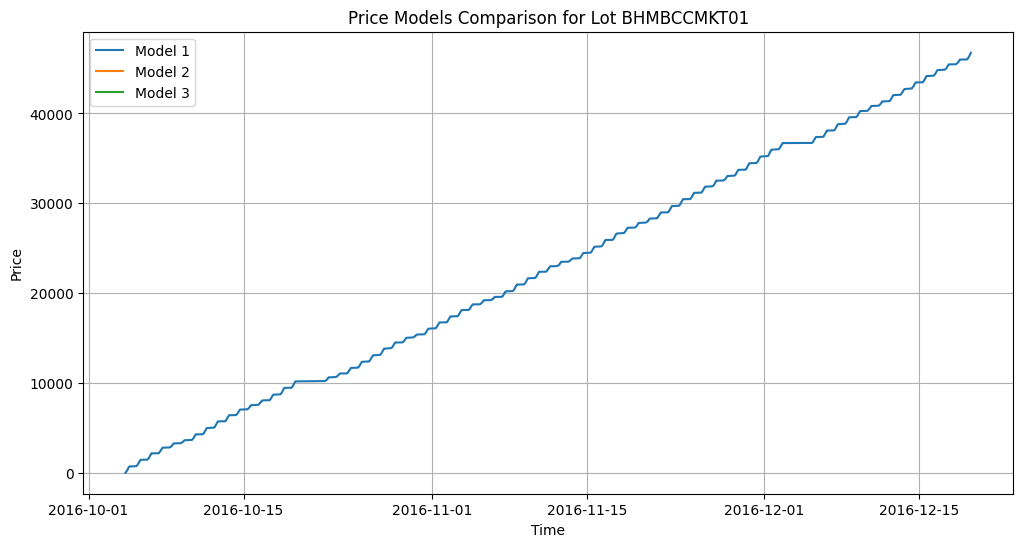

In [7]:
# Plot prices over time for a single lot
lot_id = df['SystemCodeNumber'].unique()[0]
lot_df = df[df['SystemCodeNumber'] == lot_id]

plt.figure(figsize=(12,6))
plt.plot(lot_df['LastUpdated'], lot_df['price_model1'], label='Model 1')
plt.plot(lot_df['LastUpdated'], lot_df['price_model2'], label='Model 2')
plt.plot(lot_df['LastUpdated'], lot_df['price_model3'], label='Model 3')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title(f"Price Models Comparison for Lot {lot_id}")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import threading
import pathway as pw

# Define schema
class DataSchema(pw.Schema):
    LastUpdated: str
    Capacity: int
    Occupancy: int
    QueueLength: int
    IsSpecialDay: int
    TrafficConditionNearby: str
    VehicleType: str
    Latitude: float
    Longitude: float
    SystemCodeNumber: str

# Background thread to run Pathway engine
def run_pathway():
    source = pw.io.csv.read(
        '/content/stream_input',
        schema=DataSchema,
        mode='streaming',
        autocommit_duration_ms=1000
    )

    # Model 1
    @pw.udf
    def model1(capacity, occupancy):
        return 10.0 + 5.0 * (occupancy / capacity)

    # Model 2: Demand + Traffic + Special day
    @pw.udf
    def model2(capacity, occupancy, queue, traffic, special):
        price = 10.0 + 5.0 * (occupancy / capacity)
        if queue > 5:
            price += 2
        if traffic == 'high':
            price += 1
        elif traffic == 'low':
            price -= 0.5
        if special == 1:
            price += 2
        return price

    # Model 3: Simulated competition logic
    @pw.udf
    def model3(capacity, occupancy, vehicle_type):
        price = 10.0 + 5.0 * (occupancy / capacity)
        if vehicle_type == 'truck':
            price += 3
        elif vehicle_type == 'bike':
            price -= 1
        return price

    # Apply logic
    result = source.select(
        ts=source.LastUpdated,
        lot_id=source.SystemCodeNumber,
        model1=model1(source.Capacity, source.Occupancy),
        model2=model2(source.Capacity, source.Occupancy, source.QueueLength, source.TrafficConditionNearby, source.IsSpecialDay),
        model3=model3(source.Capacity, source.Occupancy, source.VehicleType)
    )

    pw.io.csv.write(result, '/content/stream_output.csv')
    pw.run()

# Start engine
threading.Thread(target=run_pathway).start()



In [9]:
import os
import shutil
import time
import pandas as pd

stream_input_dir = "/content/stream_input"
if os.path.exists(stream_input_dir):
    shutil.rmtree(stream_input_dir)
os.makedirs(stream_input_dir)

df = pd.read_csv('/content/dataset_clean.csv')

# Stream 1 row at a time with delay
for i in range(len(df)):
    df.iloc[[i]].to_csv(f"{stream_input_dir}/row_{i}.csv", index=False)
    time.sleep(0.05)


Output()

/usr/local/lib/python3.11/dist-packages/beartype/_util/hint/pep/utilpeptest.py:311: BeartypeDecorHintPep585DeprecationWarning: PEP 484 type hint typing.Iterable[pathway.internals.expression.ColumnReference] deprecated by PEP 585. This hint is scheduled for removal in the first Python version released after October 5th, 2025. To resolve this, import this hint from "beartype.typing" rather than "typing". For further commentary and alternatives, see also:
    https://beartype.readthedocs.io/en/latest/api_roar/#pep-585-deprecations
  warn(


In [10]:


!pip install panel bokeh --quiet

import panel as pn
import pandas as pd
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import output_notebook

pn.extension()
output_notebook()

# Load initial data
df = pd.read_csv('/content/stream_output.csv') if os.path.exists('/content/stream_output.csv') else pd.DataFrame(columns=["ts", "lot_id", "model1", "model2", "model3"])
df["ts"] = pd.to_datetime(df["ts"], errors='coerce')

# Dropdowns
lots = sorted(df["lot_id"].unique()) if not df.empty else ["Select"]
models = ["model1", "model2", "model3"]

lot_selector = pn.widgets.Select(name="Lot ID", options=lots)
model_selector = pn.widgets.Select(name="Model", options=models)

# Initialize source
initial = df[df["lot_id"] == lots[0]] if lots[0] != "Select" else df
source = ColumnDataSource(data=dict(ts=initial["ts"], price=initial["model1"]))

# Plot
plot = figure(x_axis_type="datetime", title="Live Parking Price", width=900, height=400)
plot.line('ts', 'price', source=source, line_width=2, color="navy")
plot.circle('ts', 'price', source=source, size=5, color="red")

# Update function
def update():
    try:
        df = pd.read_csv('/content/stream_output.csv')
        df["ts"] = pd.to_datetime(df["ts"], errors='coerce')
        selected_lot = lot_selector.value
        selected_model = model_selector.value

        filtered = df[df["lot_id"] == selected_lot]
        source.data = dict(ts=filtered["ts"], price=filtered[selected_model])
    except:
        pass

# Watch dropdowns
lot_selector.param.watch(lambda event: update(), 'value')
model_selector.param.watch(lambda event: update(), 'value')

# Periodic updates
pn.state.add_periodic_callback(update, period=2000)

# Layout
dashboard = pn.Column(
    "### 📈 Live Dynamic Parking Price Viewer (Model 1, 2, 3)",
    lot_selector,
    model_selector,
    plot
)

dashboard.servable()



BokehDeprecationWarning: 'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 
'scatter(size=...) instead' instead.

Column
    [0] Markdown(str)
    [1] Select(name='Lot ID', options=['BHMBCCMKT01', ...], value='BHMBCCMKT01')
    [2] Select(name='Model', options=['model1', 'model2', ...], value='model1')
    [3] Bokeh(figure)